<a href="https://colab.research.google.com/github/EliasPrinceP/adaboost1/blob/main/NLP_3_TWITTER_VALIDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_cols=['Id','Location','Target','Text']
df=pd.read_csv('/content/twitter_validation.csv',names=df_cols)
df

,Id,Location,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.isna().sum()

Id          0
Location    0
Target      0
Text        0
dtype: int64

In [ ]:
df['Target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

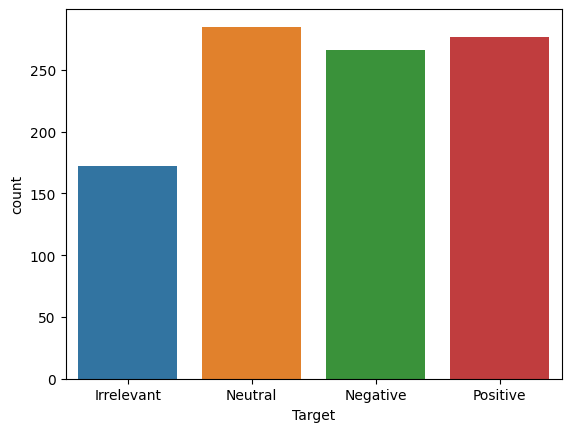

In [ ]:
import seaborn as sns
sns.countplot(x=df['Target'])

In [ ]:
#to  delete rows that contains "irrelevant"
df.drop(df.index[(df['Target']=='Irrelevant')],axis=0,inplace=True)
df

,Id,Location,Target,Text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df['Target'].value_counts()

Neutral     285
Positive    277
Negative    266
Name: Target, dtype: int64

In [ ]:
#to reset the index
df.reset_index(drop=True,inplace=True)

In [ ]:
df

,Id,Location,Target,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.drop(['Id','Location'],axis=1,inplace=True)

In [ ]:
df

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df['Target']=df['Target'].map({'Positive':1,'Negative':-1,'Neutral':0})

In [ ]:
df

,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
tweets=df.Text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
# stri='hai!!!aaa###aaaa%%%wwww@#$%^'
# import re
# lst=re.findall('[^a-zA-Z0-9]+',stri)
# lst

In [ ]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+'," ")
tweets

<ipython-input-198-3b947e35decc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+'," ")


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: Text, Length: 828, dtype: object

In [ ]:
import nltk
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [ ]:
# tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)])
# tweets

In [ ]:
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda y:" ".join(y))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: Text, Length: 828, dtype: object

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda y:" ".join(y))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: Text, Length: 828, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
train_vec=vectorizer.fit_transform(tweets)
print(train_vec)

  (0, 739)	0.2456282916977699
  (0, 526)	0.2456282916977699
  (0, 3601)	0.19717097284763976
  (0, 883)	0.11802111433875656
  (0, 1060)	0.2456282916977699
  (0, 1189)	0.22139963227270484
  (0, 2091)	0.12503547156807654
  (0, 347)	0.2135997461023189
  (0, 912)	0.16343698819954885
  (0, 857)	0.2018385048310212
  (0, 2880)	0.2456282916977699
  (0, 612)	0.2456282916977699
  (0, 1919)	0.23145543449136263
  (0, 679)	0.2135997461023189
  (0, 417)	0.14270670271218175
  (0, 2392)	0.365996231282465
  (0, 581)	0.46291086898272527
  (1, 847)	0.4055823664694651
  (1, 3016)	0.4055823664694651
  (1, 2673)	0.3821800909185634
  (1, 1474)	0.4055823664694651
  (1, 3821)	0.36557591217188057
  (1, 2575)	0.3126902562590763
  (1, 3780)	0.26216072802580975
  (1, 2254)	0.24555654927912696
  :	:
  (825, 677)	0.22981061112100945
  (825, 1053)	0.2315686698425631
  (825, 3504)	0.21750175079084832
  (825, 3354)	0.2904718522758868
  (825, 2641)	0.17148706662740873
  (826, 1449)	0.5079831062080814
  (826, 3197)	0.4786

In [ ]:
print(train_vec.shape)

(828, 3931)


In [ ]:
X=train_vec
y=df['Target'].values

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=1)

              precision    recall  f1-score   support

          -1       0.70      0.58      0.64        89
           0       0.63      0.61      0.62        93
           1       0.52      0.66      0.58        67

    accuracy                           0.61       249
   macro avg       0.62      0.62      0.61       249
weighted avg       0.63      0.61      0.62       249

              precision    recall  f1-score   support

          -1       0.73      0.59      0.65        92
           0       0.53      0.63      0.57        76
           1       0.58      0.60      0.59        81

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.62      0.61      0.61       249

              precision    recall  f1-score   support

          -1       0.80      0.51      0.62       115
           0       0.63      0.70      0.66        82
           1       0.39      0.63      0.49        52

    accuracy        

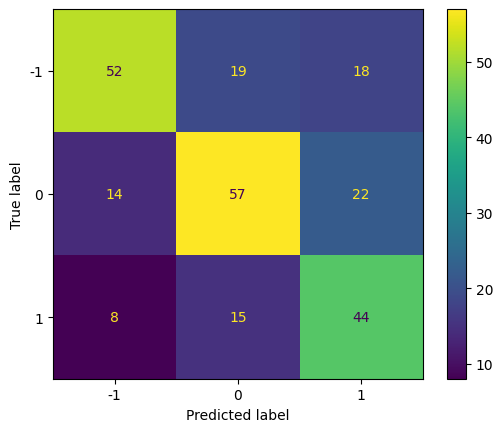

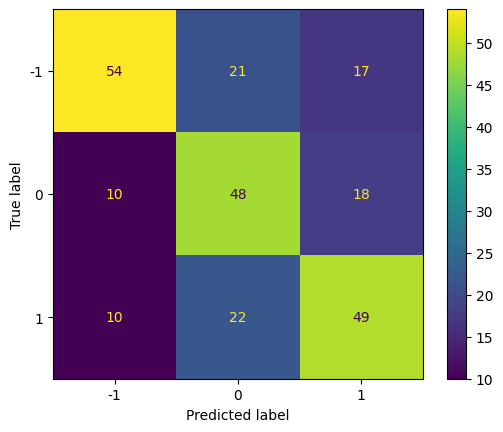

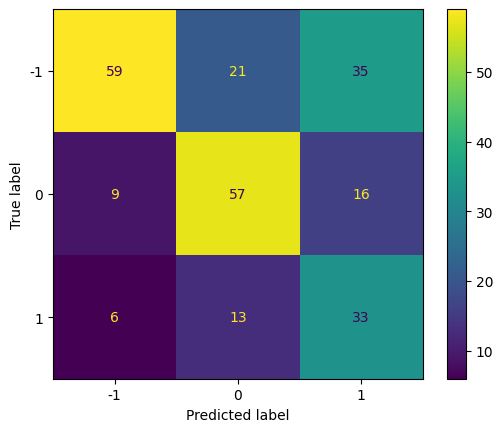

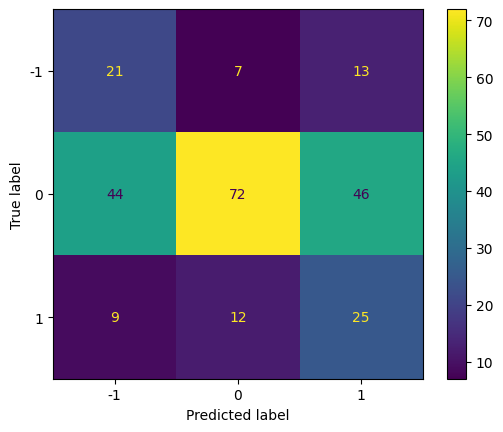

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import  MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
sv=SVC(kernel='linear')
mn=MultinomialNB()
rfc=RandomForestClassifier()
adb=AdaBoostClassifier()
lst=[sv,mn,rfc,adb]
for i in lst:
  i.fit(Xtrain,ytrain)
  ypred=i.predict(Xtest) 
  s='facebook is a hub of fake information.'
  

  print(classification_report(ypred,ytest))
  print(ConfusionMatrixDisplay.from_predictions(ypred,ytest))

In [ ]:
# training
# petal_length
# petal_width
# sepal_length
# sepal_width


